In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from patchify import patchify
import cv2

In [3]:
loaded_model = tf.keras.models.load_model('models/v2.2.h5')


In [4]:
def predict(image):
    image_height, image_width, _ = image.shape
    patch_size = 256
    # print(image.shape)
    crop_height = (image_height // patch_size) * patch_size
    crop_width = (image_width // patch_size) * patch_size
    cropped_image = image[:crop_height, :crop_width, :]

    patches = patchify(cropped_image, (patch_size, patch_size, 3), step=patch_size)
    # print(patches.shape)

    patches_list = np.array([patch for row in patches for patch in row])

    normalized_patches = [patch / 255.0 for patch in patches_list]
    #normalized_patches = (patches_list-patches_list.mean())/patches_list.std()
    normalized_patches = np.array(normalized_patches)

    predicted_patches = []

    for patch in normalized_patches:
        pred = loaded_model.predict(patch)
        
        predicted_patches.append(np.argmax(pred, axis=-1)[0])
    
    from patchify import unpatchify
    predicted_patches = np.array(predicted_patches)
    predicted_patches = predicted_patches.reshape(
        (crop_height // patch_size, crop_width // patch_size, patch_size, patch_size)
    )

    # Reconstruct full mask from patches
    reconstructed_mask = unpatchify(predicted_patches, (crop_height, crop_width))
    return reconstructed_mask


In [5]:
class_labels = ["Water", "Land", "Road", "Building", "Vegetation", "Unlabeled"]
    
colors = [
    '#0077be',  # Water - blue
    '#c2b280',  # Land - beige
    '#686868',  # Road - gray
    '#8b4513',  # Building - brown
    '#228b22',  # Vegetation - forest green
    '#ffffff'   # Unlabeled - white
]

In [6]:
def get_counts(image):
    class_counts = np.bincount(image.flatten(), minlength=len(class_labels))
    percetages = (class_counts/np.sum(class_counts))*100
    return class_counts, percetages

def plot_pie(counts):
    #plt.figure(figsize=(8, 8))
    plt.pie(
        counts,
        labels=class_labels,
        colors=colors,
        autopct="%1.1f%%",
        startangle=30,
        wedgeprops={"edgecolor": "black"},
    )
    plt.title("Class Distribution")
    #plt.show()


In [40]:
from skimage.exposure import match_histograms
def match_histogram(image):
    ref_image = cv2.imread('reference.jpg')
    return match_histograms(image, ref_image)

In [7]:
def visualize_segmentation_mask(mask):

    cmap = ListedColormap(colors)
    
    plt.figure(figsize=(10, 8))
    
    plt.imshow(mask, cmap=cmap, vmin=0, vmax=5)
    
    legend_elements = [
        Patch(facecolor=colors[i], label=class_labels[i])
        for i in range(len(class_labels))
    ]
    
    plt.legend(handles=legend_elements, 
              bbox_to_anchor=(1.05, 1),
              loc='upper left',
              borderaxespad=0.)
    
    plt.title('Segmentation Mask')
    plt.axis('off')
    
    plt.tight_layout()# prevent legend cutoff
    


In [8]:
def compare(image1, image2):
    image1_counts, image1_percentages = get_counts(image1)
    image2_counts, image2_percentages = get_counts(image2)
    change = image2_percentages - image1_percentages
    print(change)
    plt.subplot(1,2,1)
    plot_pie(image1_counts)
    plt.subplot(1,2,2)
    plot_pie(image2_counts)
    plt.show()
    plt.bar(class_labels, change, color=colors)
    plt.title('change')
    plt.show()


In [38]:
import os

image = cv2.imread(os.getcwd() + r'\dataset\Tile 4\images\image_part_009.jpg')
#reference_image = cv2.imread('reference.jpg')
image1 = image
image2 = cv2.imread('test photos/dubai.jpg')
image1 = cv2.resize(image1, (1099, 846), interpolation=cv2.INTER_AREA)
image2 = cv2.resize(image2, (1099, 846), interpolation=cv2.INTER_AREA)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


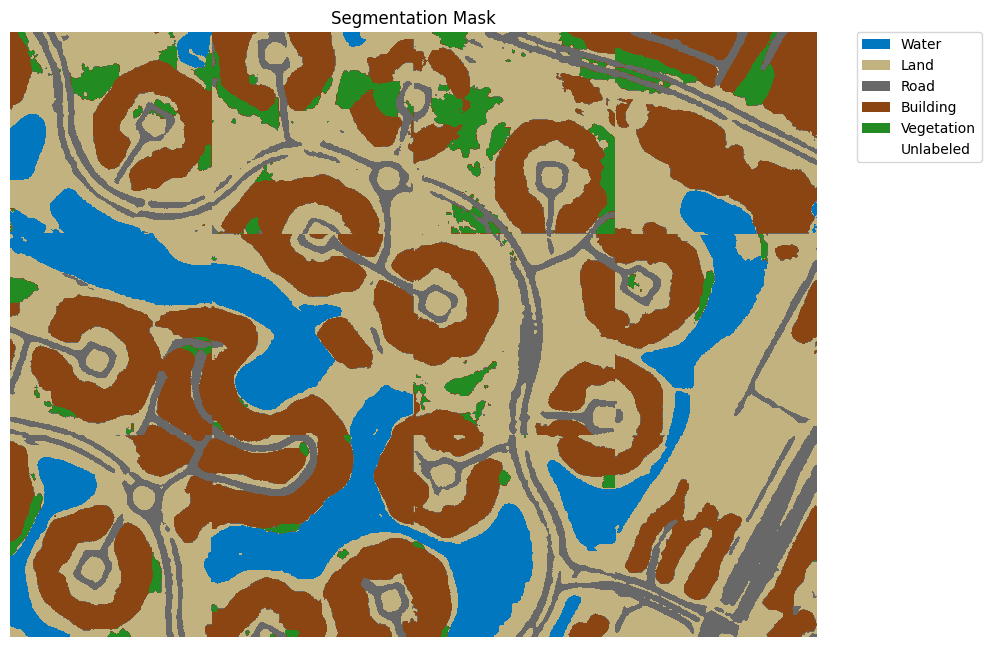

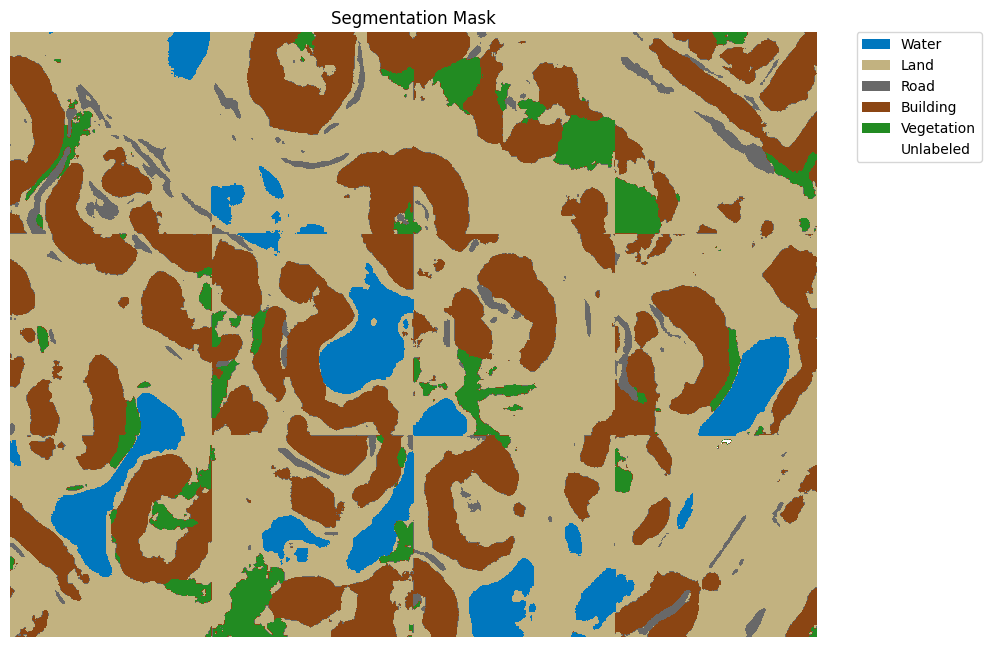

In [39]:
segmented_image1 = predict(match_histogram(image1))
segmented_image2 = predict(match_histogram(image2))
visualize_segmentation_mask(segmented_image1)
visualize_segmentation_mask(segmented_image2)


In [43]:
image.shape

(846, 1099, 3)

[-6.62549337e+00  1.84136709e+01 -8.56984456e+00 -4.01903788e+00
  7.93329875e-01  7.37508138e-03]


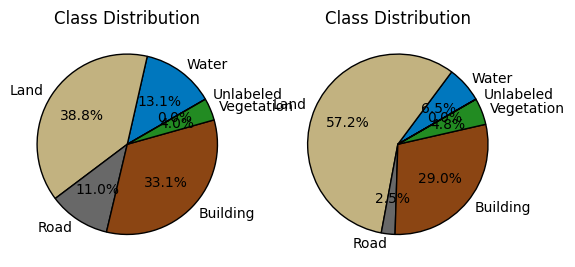

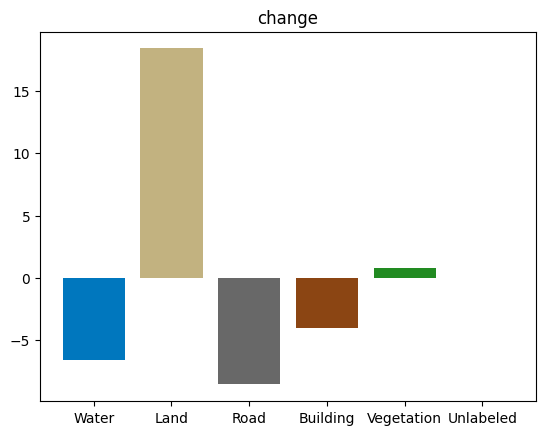

In [42]:
compare(segmented_image1, segmented_image2)